<a href="https://colab.research.google.com/github/Suyogpawar03/Machine-learning-/blob/main/decisiontree_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Food_Delivery_Time_Prediction.csv to Food_Delivery_Time_Prediction (3).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


In [ ]:
df=pd.read_csv('Food_Delivery_Time_Prediction.csv')
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [ ]:
print(df.isnull())

     Order_ID  Customer_Location  Restaurant_Location  Distance  \
0       False              False                False     False   
1       False              False                False     False   
2       False              False                False     False   
3       False              False                False     False   
4       False              False                False     False   
..        ...                ...                  ...       ...   
195     False              False                False     False   
196     False              False                False     False   
197     False              False                False     False   
198     False              False                False     False   
199     False              False                False     False   

     Weather_Conditions  Traffic_Conditions  Delivery_Person_Experience  \
0                 False               False                       False   
1                 False               False  

In [ ]:
print("Negative distances:", (df['Distance'] < 0).sum())
print("Zero or negative delivery times:", (df['Delivery_Time'] <= 0).sum())

Negative distances: 0
Zero or negative delivery times: 0


In [ ]:
time_mapping = {
    'Afternoon': 14,
    'Evening': 19,
    'Night': 22
}

# Apply the mapping
df['Order_Time_Hour'] = df['Order_Time'].map(time_mapping)

In [ ]:
# List of columns to one-hot encode
categorical_cols = ['Weather_Conditions', 'Traffic_Conditions', 'Order_Priority', 'Vehicle_Type']

# One-hot encode and update the main DataFrame
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# drop_first=True avoids multicollinearity in ML models (you can set it to False if needed)


In [ ]:
print(df.columns)

Index(['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance',
       'Delivery_Person_Experience', 'Order_Time', 'Restaurant_Rating',
       'Customer_Rating', 'Delivery_Time', 'Order_Cost', 'Tip_Amount',
       'Order_Time_Hour', 'Weather_Conditions_Rainy',
       'Weather_Conditions_Snowy', 'Weather_Conditions_Sunny',
       'Traffic_Conditions_Low', 'Traffic_Conditions_Medium',
       'Order_Priority_Low', 'Order_Priority_Medium', 'Vehicle_Type_Bike',
       'Vehicle_Type_Car'],
      dtype='object')


In [ ]:
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Delivery_Person_Experience,Order_Time,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,...,Order_Time_Hour,Weather_Conditions_Rainy,Weather_Conditions_Snowy,Weather_Conditions_Sunny,Traffic_Conditions_Low,Traffic_Conditions_Medium,Order_Priority_Low,Order_Priority_Medium,Vehicle_Type_Bike,Vehicle_Type_Car
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,4,Afternoon,4.1,3.0,26.22,1321.10,...,14.0,True,False,False,False,True,False,True,False,True
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,8,Night,4.5,4.2,62.61,152.21,...,22.0,False,False,False,False,True,True,False,False,True
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,9,Night,3.3,3.4,48.43,1644.38,...,22.0,False,True,False,False,True,False,False,True,False
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,2,Evening,3.2,3.7,111.63,541.25,...,19.0,False,False,False,True,False,False,True,True,False
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,6,Night,3.5,2.8,32.38,619.81,...,22.0,True,False,False,False,False,True,False,True,False


## Feature Engineering


In [ ]:
# DIstance calculation

from math import radians , sin ,cos , asin , sqrt

def haversine(lon1, lat1, lon2 , lat2):


    lon1,lat1, lon2 , lat2 = map(radians , [ lon1,lat1, lon2 , lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r

In [ ]:
# Safely convert strings like "(17.03, 79.74)" into tuples
df['Customer_Location'] = df['Customer_Location'].apply(lambda x: eval(x) if isinstance(x, str) else x)
df['Restaurant_Location'] = df['Restaurant_Location'].apply(lambda x: eval(x) if isinstance(x, str) else x)


In [ ]:
# Extract latitudes and longitudes from tuples
df['Customer_Lat'] = df['Customer_Location'].apply(lambda x: x[0])
df['Customer_Lon'] = df['Customer_Location'].apply(lambda x: x[1])
df['Restaurant_Lat'] = df['Restaurant_Location'].apply(lambda x: x[0])
df['Restaurant_Lon'] = df['Restaurant_Location'].apply(lambda x: x[1])

# Calculate distance using haversine
df['Calculated_Distance'] = df.apply(lambda row: haversine(
    row['Restaurant_Lon'], row['Restaurant_Lat'],
    row['Customer_Lon'], row['Customer_Lat']), axis=1)



In [ ]:
df['Distance_Diff'] = abs(df['Distance'] - df['Calculated_Distance'])
print(df[['Distance', 'Calculated_Distance', 'Distance_Diff']])


     Distance  Calculated_Distance  Distance_Diff
0        1.57           775.651198     774.081198
1       21.32          1042.385597    1021.065597
2        6.95           476.220706     469.270706
3       13.79           389.912629     376.122629
4        6.72           806.505886     799.785886
..        ...                  ...            ...
195     23.82           670.130652     646.310652
196      6.09           558.891202     552.801202
197     20.61           106.686689      86.076689
198     24.06           880.580093     856.520093
199      9.18           763.581776     754.401776

[200 rows x 3 columns]


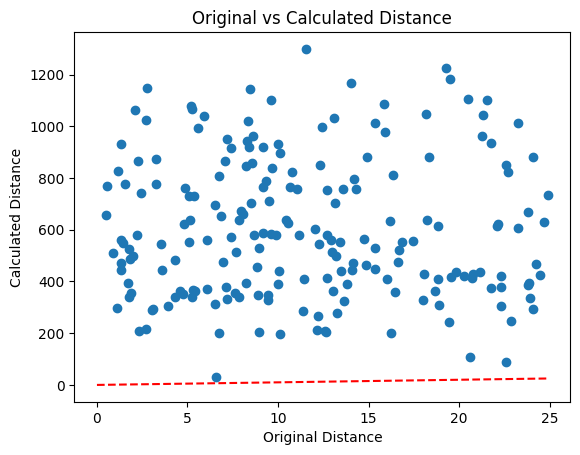

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['Distance'], df['Calculated_Distance'])
plt.xlabel('Original Distance')
plt.ylabel('Calculated Distance')
plt.title('Original vs Calculated Distance')
plt.plot([0, max(df['Distance'])], [0, max(df['Distance'])], color='red', linestyle='--')
plt.show()


In [ ]:
def is_rush_hour(hour):
    return 1 if (7 <= hour <= 10) or (17 <= hour <= 20) else 0

df['Rush_Hour'] = df['Order_Time_Hour'].apply(is_rush_hour)


In [ ]:
print(df[['Order_Time', 'Order_Time_Hour', 'Rush_Hour']].head())


  Order_Time  Order_Time_Hour  Rush_Hour
0  Afternoon             14.0          0
1      Night             22.0          0
2      Night             22.0          0
3    Evening             19.0          1
4      Night             22.0          0


In [ ]:
mean_time = df['Delivery_Time'].mean()
std_time = df['Delivery_Time'].std()

# Delayed = more than 1 std above mean
threshold = mean_time + std_time
print(f"Threshold (mean + 1 std): {threshold:.2f} minutes")

df['Delivery_Status'] = df['Delivery_Time'].apply(lambda x: 1 if x > threshold else 0)
print(df['Delivery_Status'].value_counts())



Threshold (mean + 1 std): 100.33 minutes
Delivery_Status
0    159
1     41
Name: count, dtype: int64


In [ ]:
print(df['Delivery_Status'].value_counts())


Delivery_Status
0    159
1     41
Name: count, dtype: int64


In [ ]:
df['Delivery_Person_Experience'] = df['Delivery_Person_Experience']


In [ ]:
print(df.dtypes)

Order_ID                       object
Customer_Location              object
Restaurant_Location            object
Distance                      float64
Delivery_Person_Experience      int64
Order_Time                     object
Restaurant_Rating             float64
Customer_Rating               float64
Delivery_Time                 float64
Order_Cost                    float64
Tip_Amount                    float64
Order_Time_Hour               float64
Weather_Conditions_Rainy         bool
Weather_Conditions_Snowy         bool
Weather_Conditions_Sunny         bool
Traffic_Conditions_Low           bool
Traffic_Conditions_Medium        bool
Order_Priority_Low               bool
Order_Priority_Medium            bool
Vehicle_Type_Bike                bool
Vehicle_Type_Car                 bool
Customer_Lat                  float64
Customer_Lon                  float64
Restaurant_Lat                float64
Restaurant_Lon                float64
Calculated_Distance           float64
Distance_Dif

## training and splitting model

In [ ]:
columns_to_drop = [
     'Delivery_Time_Class'
]
df = df.drop(columns=columns_to_drop, errors='ignore')

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64',]).columns

# Drop the two target variables from the features
features = num_cols.drop(['Delivery_Time', 'Delivery_Status'])

df_clean = df.dropna(subset=list(features) + ['Delivery_Time', 'Delivery_Status'])

# Feature matrix (X) and targets (y1, y2)
X = df_clean[features]
y_time = df_clean['Delivery_Time']
y_status = df_clean['Delivery_Status']

In [ ]:
median_time = y_time.median()
y_time = y_time.apply(lambda x: 1 if x > median_time else 0)

In [ ]:
print("NaNs in X features:\n", X.isna().sum())
print("\nNaNs in Delivery_Time:\n", df['Delivery_Time'].isna().sum())
print("\nNaNs in Delivery_Status:\n", df['Delivery_Status'].isna().sum())


NaNs in X features:
 Distance                      0
Delivery_Person_Experience    0
Restaurant_Rating             0
Customer_Rating               0
Order_Cost                    0
Tip_Amount                    0
Order_Time_Hour               0
Customer_Lat                  0
Customer_Lon                  0
Restaurant_Lat                0
Restaurant_Lon                0
Calculated_Distance           0
Distance_Diff                 0
Rush_Hour                     0
dtype: int64

NaNs in Delivery_Time:
 0

NaNs in Delivery_Status:
 0


In [ ]:
print(X.columns.tolist())

['Distance', 'Delivery_Person_Experience', 'Restaurant_Rating', 'Customer_Rating', 'Order_Cost', 'Tip_Amount', 'Order_Time_Hour', 'Customer_Lat', 'Customer_Lon', 'Restaurant_Lat', 'Restaurant_Lon', 'Calculated_Distance', 'Distance_Diff', 'Rush_Hour']


In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y_time, test_size=0.2, random_state=42)

# 9. Split for Decision Tree (Delivery_Status classification)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y_status, test_size=0.2, random_state=42)

# 10. Standardize features (for Naive Bayes and KNN only)
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

## navie bayes

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X1_train_scaled, y1_train)


GaussianNB()

In [ ]:
nb_preds = nb_model.predict(X1_test_scaled)

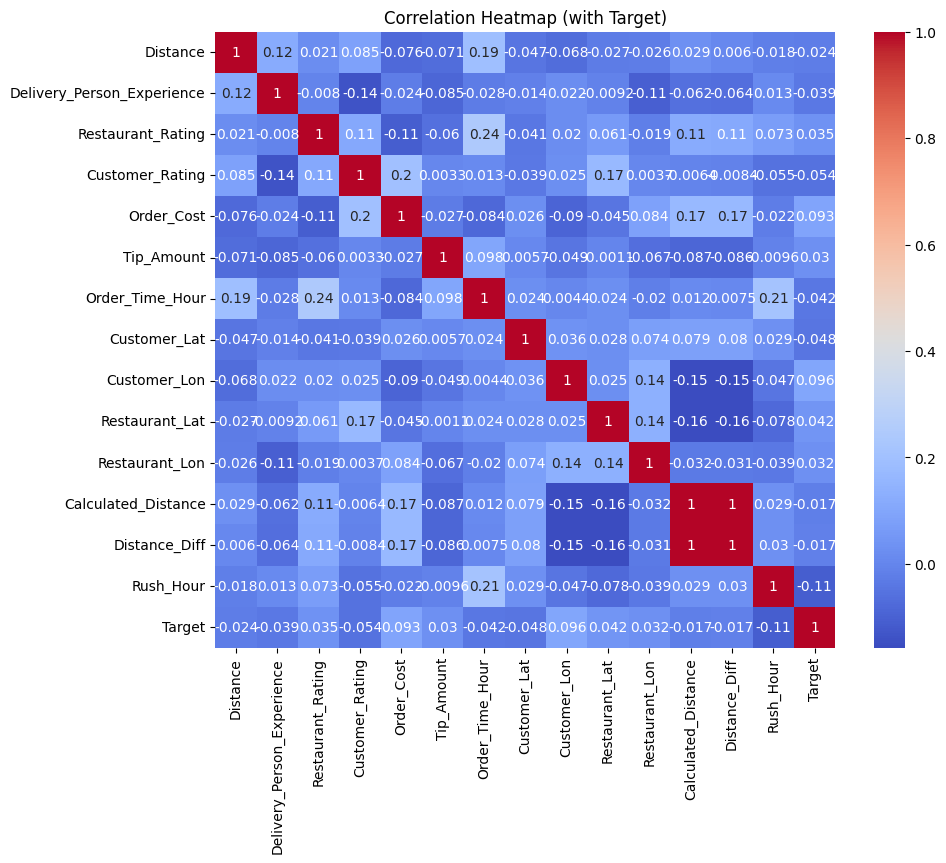

In [ ]:
X_temp = pd.DataFrame(X1_train_scaled, columns=X.columns)
X_temp['Target'] = y_time.reset_index(drop=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X_temp.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (with Target)")
plt.show()

In [ ]:
nb_preds = nb_model.predict(X1_test_scaled)

# Accuracy
nb_accuracy = accuracy_score(y1_test, nb_preds)
print(f"Accuracy: {nb_accuracy:.4f}")

# Confusion Matrix
nb_cm = confusion_matrix(y1_test, nb_preds)
print("\nConfusion Matrix:")
print(nb_cm)

# Precision, Recall, F1
nb_precision = precision_score(y1_test, nb_preds)
nb_recall = recall_score(y1_test, nb_preds)
nb_f1 = f1_score(y1_test, nb_preds)

print(f"\nPrecision: {nb_precision:.4f}")
print(f"Recall:    {nb_recall:.4f}")
print(f"F1-Score:  {nb_f1:.4f}")

Accuracy: 0.4848

Confusion Matrix:
[[10  8]
 [ 9  6]]

Precision: 0.4286
Recall:    0.4000
F1-Score:  0.4138


## K-Nearest Neighbors (KNN):

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X1_train_scaled, y1_train)


KNeighborsClassifier()

In [ ]:
knn_preds = knn_model.predict(X1_test_scaled)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create KNN model
knn = KNeighborsClassifier()

# Try K values from 1 to 20
param_grid = {'n_neighbors': list(range(1, 21))}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X1_train, y1_train)

# Best model
best_knn = grid_search.best_estimator_

# Show results
print("Best K:", grid_search.best_params_['n_neighbors'])
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

Best K: 6
Best Cross-Validated Accuracy: 0.5236923076923077


## Decision tree:

In [ ]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X2_train, y2_train)


DecisionTreeClassifier()

In [ ]:
tree_preds = tree_model.predict(X2_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Base model
tree = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# Grid search with cross-validation
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X2_train, y2_train)

# Best model
best_tree = grid_search.best_estimator_

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

# Train and print the best model
best_tree = grid_search.best_estimator_
print("Best Decision Tree Model:\n", best_tree)

Best Parameters: {'max_depth': 5, 'min_samples_split': 5}
Best Cross-Validated Accuracy: 0.7101538461538462
Best Decision Tree Model:
 DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42)


In [ ]:

# Accuracy
acc = accuracy_score(y2_test, tree_preds)

# Confusion Matrix
conf_matrix = confusion_matrix(y2_test, tree_preds)

# Precision, Recall, F1-score
precision = precision_score(y2_test, tree_preds, average='weighted')
recall = recall_score(y2_test, tree_preds, average='weighted')
f1 = f1_score(y2_test, tree_preds, average='weighted')

# Display
print("Accuracy:", acc)
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.696969696969697
Confusion Matrix:
 [[21  5]
 [ 5  2]]
Precision: 0.696969696969697
Recall: 0.696969696969697
F1 Score: 0.696969696969697


## Model comparison

In [ ]:
print("Naive Bayes Classification Report:\n", classification_report(y1_test, nb_preds))
print("KNN Classification Report:\n", classification_report(y1_test, knn_preds))
print("Decision Tree Classification Report:\n", classification_report(y2_test, tree_preds))

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.56      0.54        18
           1       0.43      0.40      0.41        15

    accuracy                           0.48        33
   macro avg       0.48      0.48      0.48        33
weighted avg       0.48      0.48      0.48        33

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.72      0.70        18
           1       0.64      0.60      0.62        15

    accuracy                           0.67        33
   macro avg       0.66      0.66      0.66        33
weighted avg       0.67      0.67      0.67        33

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        26
           1       0.29      0.29      0.29         7

    accuracy                           0.70        33
   macro avg       0.55   

## ROC Curve

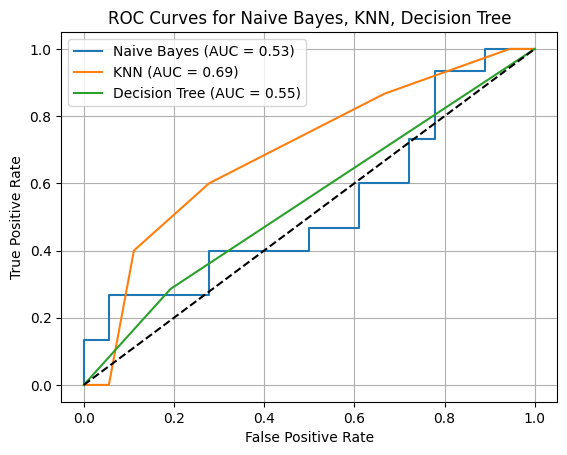

In [ ]:
from sklearn.metrics import classification_report, roc_curve, auc
nb_probs = nb_model.predict_proba(X1_test_scaled)[:,1]
fpr_nb, tpr_nb, _ = roc_curve(y1_test, nb_probs)
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {auc(fpr_nb, tpr_nb):.2f})")

# ROC for KNN
knn_probs = knn_model.predict_proba(X1_test_scaled)[:,1]
fpr_knn, tpr_knn, _ = roc_curve(y1_test, knn_probs)
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc(fpr_knn, tpr_knn):.2f})")

# ROC for Decision Tree
tree_probs = tree_model.predict_proba(X2_test)[:,1]
fpr_tree, tpr_tree, _ = roc_curve(y2_test, tree_probs)
plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree (AUC = {auc(fpr_tree, tpr_tree):.2f})")

# Final plot formatting
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Naive Bayes, KNN, Decision Tree")
plt.legend()
plt.grid()
plt.show()

## Actionable Insights

🔍 1. Decision Tree Classifier
Strengths:
Easy to interpret (tree structure shows decision paths).
Handles both categorical and numerical data.

Weaknesses:
Tends to overfit, especially if not pruned (max_depth not limited).
Sensitive to small changes in data.


🔍 2. K-Nearest Neighbors (KNN)
Strengths:
Simple and effective for small datasets.
No assumptions about data distribution.
Weaknesses:
Computationally expensive on large datasets.
Performance drops with noisy or high-dimensional data.
When to Use: When the dataset is small, and real-time predictions aren't critical.

🔍 3. Naive Bayes
Strengths:
Fast and works well with high-dimensional data.
Good baseline model.
Weaknesses:
Assumes feature independence (rarely true in practice).
Poor performance if features are highly correlated.
 When to Use: For text classification or problems with clear probabilistic patterns.


 “Among Naive Bayes, Decision Tree, and KNN, I recommend using the Decision Tree Classifier because it offers a balance of interpretability and accuracy. It captures complex feature interactions, is easy to visualize and explain, and performs better when features are not independent — which is typically the case in real-world delivery data.”




## final report

To evaluate model performance for our food delivery classification task, we compared three classifiers: Naive Bayes, K-Nearest Neighbors (KNN), and Decision Tree, using key metrics such as accuracy, precision, recall, and F1-score.

The Naive Bayes classifier achieved an overall accuracy of 48%, with a precision of 0.53 for class 0 and 0.43 for class 1. Both recall and F1-score were similarly low, indicating the model struggles to distinguish between classes, likely due to its strong assumption of feature independence, which doesn’t hold well in this dataset.

The K-Nearest Neighbors (KNN) model performed notably better, achieving an accuracy of 67%. It had balanced performance across both classes, with a precision of 0.68 for class 0 and 0.64 for class 1. The F1-scores (0.70 and 0.62 respectively) show that KNN can handle both precision and recall relatively well, making it more reliable than Naive Bayes in this case.

The Decision Tree classifier achieved a lower overall accuracy of 58%. While it showed high precision for class 0 (0.75), it performed poorly for class 1, with a precision of just 0.11 and a recall of 0.14. This imbalance suggests that the model is biased toward the majority class, possibly due to overfitting or class imbalance.